Sidney Jones 
88140868
Dsci 100 project planning - individual 

Question Broad : What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Question Specific : Can higher average playtime and number of sessions played help predict whethere a player will subscirbe to the PLAICraft newsletter?

In [1]:
#Data 
library(tidyverse)
players <- read_csv("dsci-100-student/materials/R/project_planning/players.csv")
sessions <- read_csv("dsci-100-student/materials/R/project_planning/sessions.csv")
glimpse(players)
glimpse(sessions)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

In [2]:
print(paste("players.csv:", nrow(players), "rows and", ncol(players), "columns"))
print(paste("sessions.csv:", nrow(sessions), "rows and", ncol(sessions), "columns"))


[1] "players.csv: 196 rows and 7 columns"
[1] "sessions.csv: 1535 rows and 5 columns"


In [3]:
players |>
  select(where(is.numeric)) |>
  summarize(across(everything(), ~round(mean(.x, na.rm = TRUE), 2)))


played_hours,Age
<dbl>,<dbl>
5.85,21.14


(1) Data Description: 

My project is using PLAICraft MInecrafts' datasets that were collected by the research server conducting this project at UBC. The objective is to find out if wheter a player subscribes to PLAICraft newsletter is determined through player characteristics. 
players.csv 
The data contains 196 players and 7 variables. 
Table of seven variables and description: 
| Variable | Type | Description |
|----------|------|-------------|
|experience | Catergorical | Player's overall gaming experience - self-reported |
| subscribe | Logical | TRUE/FALSE for if they are subscribing to the newsletter |
| hashedEmail | Character | Unique player identifier for each player|
| played_hours | Numeric | Total hours played on the server by individual player |
| name | Character | Player's display name on their account |
| gender | Categorical | Player’s gender, which is self-reported |
| Age | Numeric | Player's age in years |

sessions.csv
There are 5 variables measured, and 1,535 gameplay sessions are contained in the dataset.

| Variable | Type | Description |
|----------|------|-------------|
| hashedEmail | Character | Player's identifier that links to players.csv |
| start_time | Character | Start time of the play session (string timestamp) |
| end_time | Character | End time of the play session (string timestamp) |
| original_start_time | Numeric | Unix timestamp of session start time |
| original_end_time | Numeric | Unix timestamp of session end time |

The mean playtime is 5.85 hours played, and the mean age is 21.14 years old from the players.csv dataset.

Errors to watch for
- Sessions recorded could have slight errors due to logging variations, which could lead to very slight issues in the reflection of playtime by players.
- Players who have 0 playtime could impact the effectiveness of models.
- Start and end times must be converted to datetime to continue.


(2) Questions:

Question Broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Question Specific: Can higher average playtime and number of sessions played help predict whether a player will subscribe to the PLAICraft newsletter?

How the data set helped answer the question: The played_hours row helps to see how many hours each player has played, and then, using the sessions.csv, you can calculate how many sessions each player played. Additionally, the subscribe row gives the answer to what we are trying to assume, giving a TRUE/FALSE outcome to the subscription. WE can then see if those who subscribe are players who are playing longer hours and more sessions.

3) Exploratory Data Analysis and Visualization

In [9]:
#(3) Exploratory Data Analysis and Visualization
sessions_per_player <- sessions |>
  group_by(hashedEmail) |>
  summarize(num_sessions = n())

players_joined <- players |>
  left_join(sessions_per_player, by = "hashedEmail")
players_joined


experience,subscribe,hashedEmail,played_hours,name,gender,Age,num_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,1


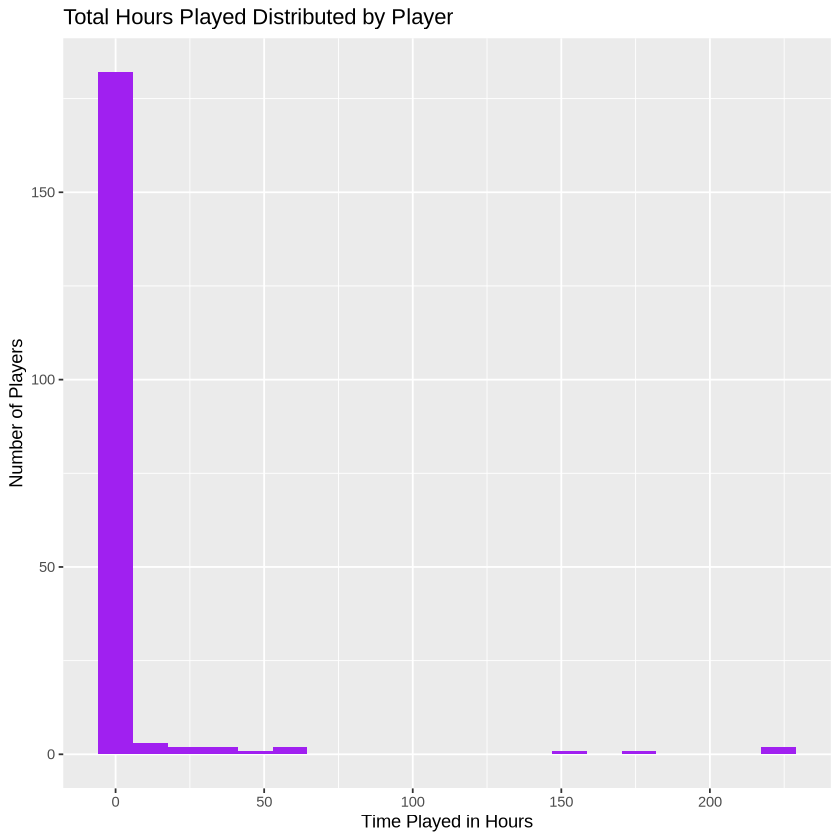

In [13]:
ggplot(players,aes(x=played_hours)) +
geom_histogram(bins=20, fill ="purple") +
labs (title = "Total Hours Played Distributed by Player", x = "Time Played in Hours", y = "Number of Players")

Most players average less than 5 hours of gameplay. Very few players fall in between 75-150 hours played. There is again a few players in the over 150 hours played area. This inidcates that people are either playing very causally or on the complete either end and are negaging very hevaily. 

Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


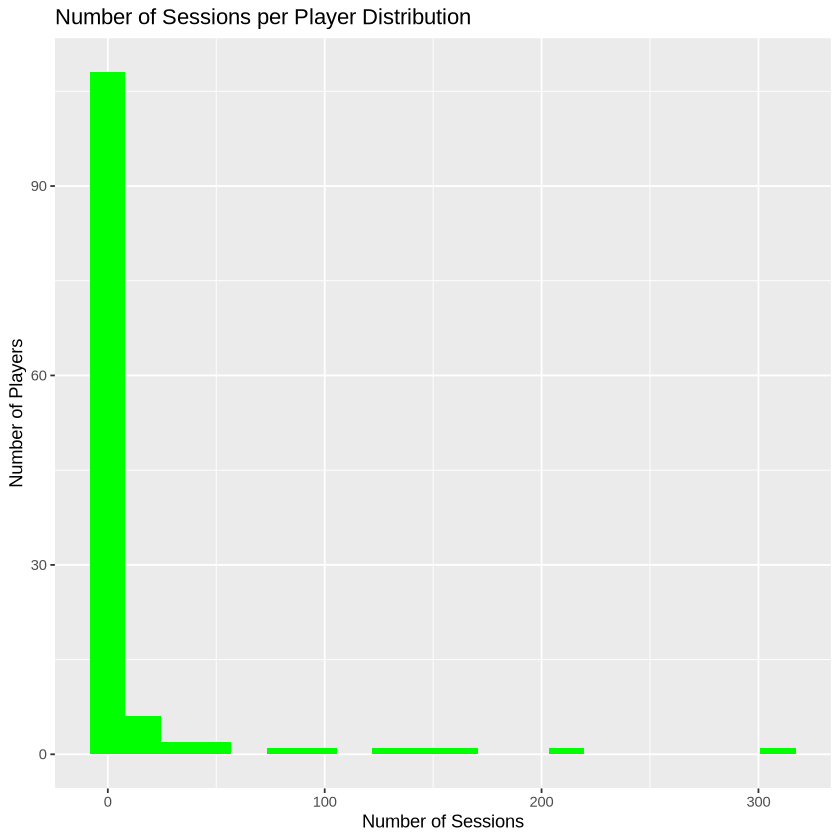

In [15]:
ggplot(players_joined, aes(x = num_sessions)) +
  geom_histogram(bins = 20, fill = "green") +
  labs(title = "Number of Sessions per Player Distribution",x = "Number of Sessions",y = "Number of Players"
  )

A warning appeared when I made the plot and it explained that some players have no recorded sessions and because of that they were removed automatically when the plot was made. This was an error that I anticpated because some of the players in the players.csv were listed but didn't have any matching sessions for there player id in the sessions.csv.

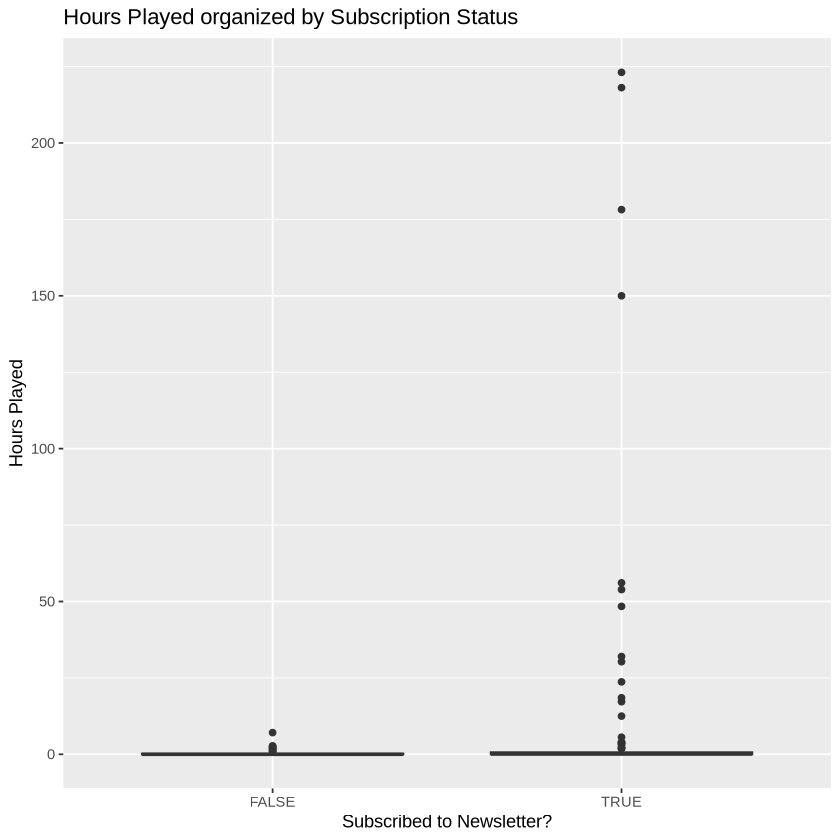

In [16]:
ggplot(players_joined, aes(x = subscribe, y = played_hours)) +
  geom_boxplot(fill = "pink") +
  labs(title = "Hours Played organized by Subscription Status", x = "Subscribed to Newsletter?", y = "Hours Played"
  )


This plot indicates that subscribers to the PLAICraft newsletter tend to have greater total playtime than non-subscribers. While the majority of players are low-hour players, it is the heavy-playtime users that are mostly in the subscription group. This lends credence to the idea that playtime may predict subscription.

Warning message:
“Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


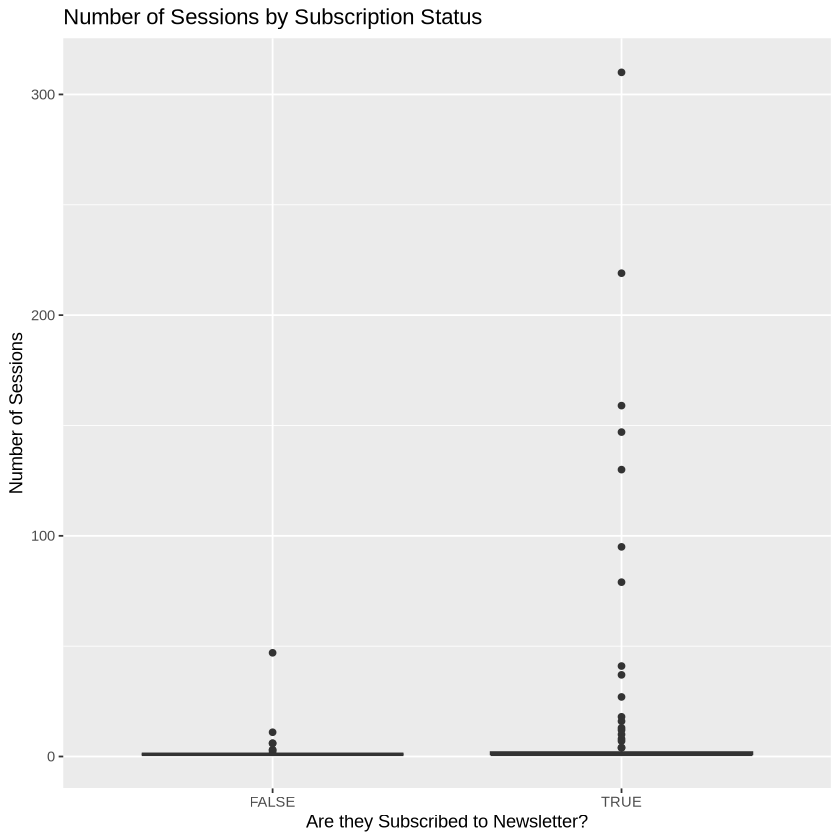

In [17]:
ggplot(players_joined, aes(x = subscribe, y = num_sessions)) +
  geom_boxplot(fill = "blue") +
  labs( title = "Number of Sessions by Subscription Status", x = "Are they Subscribed to Newsletter?",y = "Number of Sessions")


There is a notable difference in the number of sessions between subscribers and non-subscribers. Non-subscribers tend to have relatively few sessions, while subscribers comprise a large percentage of highly engaged players who have dozens or even hundreds of sessions. This pattern suggests that the number of sessions is possibly a strong predictor of whether a player subscribes to the newsletter.

(4) Methods and Plan
Model: I plan to use a classification model because the subscribe variable is a TRUE/FALSE categorical variable. I think that I would use KNN classification to organize and predict the data. In my project, the response variable subscribe is binary (TRUE/FALSE), so that KNN can classify new players based on the similarity of their characteristics (e.g. playtime, number of sessions) to other players in the dataset. Using KNN means that I will need to scale numeric predictors so that all the variables are on similar scales to get accurate predictions. Having a lot of outliers could also cause issues with the precision, so it would be important to choose a good k. KNN needs certain assumptions to work properly, like that KNN assumes numeric variables are on similar scales, which is why I have to scale the data first. Additionally, KNN will have trouble with extreme outliers or superimbalanced data, so it might be beneficial to take out outliers. Additionally, KNN will assume that players who have a similar amount of laytime and number of sessions should have similar subscription methods, which is how it does its approximation classification. 
Data Preparation: I would have to combine the players.csv and the sessions.csv to find the number of sessions per player. I would also have to deal with any of the players with missing session counts. I will also have to scale all my numeric variables to make sure the data aligns properly. The data will also have to be split, with the training data being 75% and the testing set 25%. In conclusion, there is quite a few changes I must make to the data to make it organized and able to use classification, and I will tune the value of k to find the best option using a 5-fold cross-validation. To find the best k, I will choose the k that gives a high cross-validated performance, as I expect it to be more accurate in classification. 

5) GitHub Repository
Here is the link to my GitHub including my 5 
